### Perceptron Learning

In [77]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

x, y = datasets.make_blobs(n_samples = 150, n_features = 2, centers = 2, cluster_std = 1.05, random_state = 2)

print(x.shape, y.shape)

(150, 2) (150,)


In [89]:
x

array([[-5.32783010e-01, -1.64847081e+00],
       [-5.50226372e-01, -1.16166152e+01],
       [ 1.38862276e+00, -1.43580590e+00],
       [ 1.37033956e+00, -6.40220712e-01],
       [-8.80606388e-01, -9.70946740e+00],
       [-2.22746033e+00, -1.01019963e+01],
       [-3.83660791e+00, -9.36311253e+00],
       [-2.61500332e-01, -1.80587922e+00],
       [ 1.18267985e+00, -7.12729660e-01],
       [-8.91135194e-01, -8.05385981e+00],
       [-3.42244116e+00, -9.43290706e+00],
       [-3.24159714e+00, -7.66373146e+00],
       [-8.14411765e-02, -1.76413571e+00],
       [ 2.82215236e+00, -1.76342807e+00],
       [ 1.90632766e+00, -2.43499725e+00],
       [ 1.12041042e+00, -2.18272234e+00],
       [ 4.12652646e-01, -9.79048994e-01],
       [-1.61986103e+00, -9.03645942e+00],
       [ 1.24676117e+00, -7.71255216e-01],
       [-2.01362140e+00, -1.04568119e+01],
       [-6.48510353e-01, -9.47763290e+00],
       [ 1.90763236e+00, -6.71105011e-01],
       [-7.57264801e-01, -9.34864598e+00],
       [ 2.

In [86]:
x[:,0]

array([-0.53278301, -0.55022637,  1.38862276,  1.37033956, -0.88060639,
       -2.22746033, -3.83660791, -0.26150033,  1.18267985, -0.89113519,
       -3.42244116, -3.24159714, -0.08144118,  2.82215236,  1.90632766,
        1.12041042,  0.41265265, -1.61986103,  1.24676117, -2.0136214 ,
       -0.64851035,  1.90763236, -0.7572648 ,  2.18263294,  1.53216357,
        1.12431439,  1.19440189, -2.43377785,  0.35055007, -0.75207647,
        0.83769501,  1.86418091,  2.07793008, -3.16320932,  2.09100144,
       -1.51976189,  1.57354644, -1.23648559, -0.28925107,  0.26095995,
        1.39785819, -0.82493081, -1.63748148, -1.76520757,  0.50148599,
        0.66536535, -1.05318015,  0.60212054, -0.87914241,  0.3698062 ,
       -1.94963972,  1.05673513,  2.16363071, -0.4141638 , -0.04789388,
       -1.47904469, -1.01070298, -1.94651523, -2.76985304, -2.15069401,
        0.80950287,  2.56504894, -0.12118447, -1.60928556, -0.21530353,
       -1.57009042,  1.37655575, -1.99166131,  1.75487048,  1.02

In [70]:
x[:,1]

array([-1.64847081e+00, -1.16166152e+01, -1.43580590e+00, -6.40220712e-01,
       -9.70946740e+00, -1.01019963e+01, -9.36311253e+00, -1.80587922e+00,
       -7.12729660e-01, -8.05385981e+00, -9.43290706e+00, -7.66373146e+00,
       -1.76413571e+00, -1.76342807e+00, -2.43499725e+00, -2.18272234e+00,
       -9.79048994e-01, -9.03645942e+00, -7.71255216e-01, -1.04568119e+01,
       -9.47763290e+00, -6.71105011e-01, -9.34864598e+00, -9.04732063e-01,
       -1.64513848e+00, -4.99224897e-01, -1.98887161e+00, -7.81776395e+00,
       -1.66237773e+00, -1.07890279e+01,  2.82956613e-01, -6.31399082e-01,
       -1.63900470e+00, -1.03653101e+01,  1.43914678e-01, -1.16545682e+01,
       -2.17601731e+00, -1.06552971e+01,  6.01148326e-01, -9.83393657e+00,
       -1.10283073e+01, -8.13917717e+00,  6.23742032e-01, -9.11304244e+00,
       -2.61100847e+00,  9.58359846e-01, -1.14330184e+01, -9.93193935e+00,
       -8.88688615e+00, -8.65765515e-02, -1.07284683e+01, -2.69907047e+00,
       -8.46207098e+00, -

Text(0.5, 1.0, 'Random Classification with 2 classes')

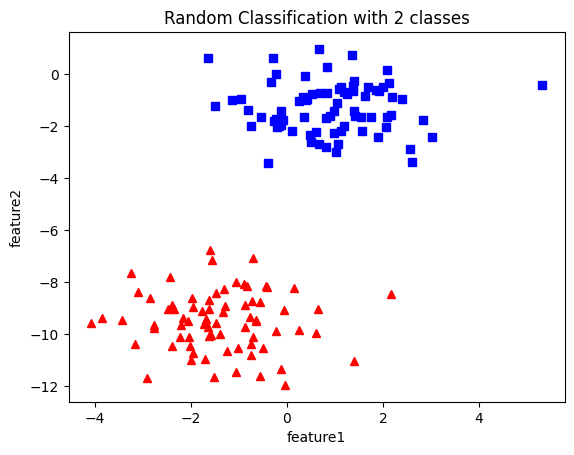

In [71]:
plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], "r^") # r^: r = red, ^ = triangle
plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], "bs") # bs: b = blue, s = square
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.title("Random Classification with 2 classes")

In [72]:
def step_func(z):
    if (z>0):
        return 1.0 
    else:
        return 0.0

def perceptron(x, y, learning_rate, epochs):
    n_samples, n_features = x.shape

    weights = np.zeros((n_features + 1, 1))

    missed_list = []

    for _ in range(epochs):
        n_missed = 0

        for idx, x_i in enumerate(x):
            x_i = np.insert(x_i, 0, 1).reshape(-1, 1)
            y_hat = step_func(np.dot(x_i.T, weights))
            if((y_hat - y[idx]) != 0):
                weights += learning_rate * ((y[idx] - y_hat) * x_i)
                n_missed += 1
            missed_list.append(n_missed)

    return weights, missed_list

weights, missed_list = perceptron(x, y, 0.5, 100)

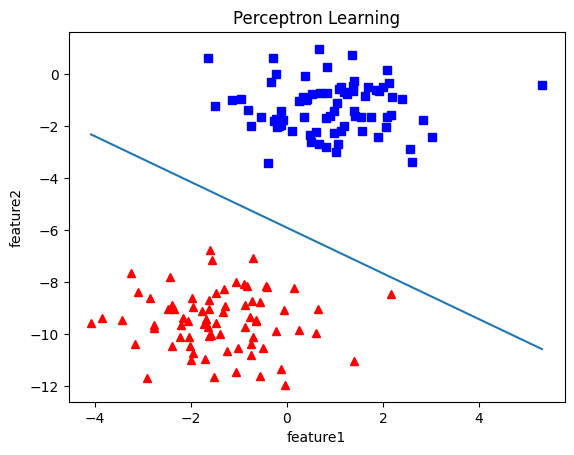

In [73]:
plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], "r^") # r^: r = red, ^ = triangle
plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], "bs") # bs: b = blue, s = square
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.title("Perceptron Learning")

x1 = [min(x[:, 0]), max(x[:, 0])]
m = -weights[1] / weights[2]
c = -weights[0] / weights[2]
x2 = (m * x1) + c

plt.plot(x1, x2)